# Lecture 3: Data visualization

_"Data visualization", "chart", "graph", and  will be used interchangeably._

_Please sign attendance sheet_

## Start by importing necessary packages

In [1]:
import pandas as pd
import plotly.express as px

## [Fertility rates](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?end=2022&start=1960&view=chart)

_Jump ahead to [line chart](#line-chart)_

### Load data

In [2]:
!mkdir -p tmp
!wget -O tmp/fertility.zip -nc 'https://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=csv'

File ‘tmp/fertility.zip’ already there; not retrieving.


In [3]:
!rm -rf tmp/fertility
!unzip tmp/fertility.zip -d tmp/fertility

Archive:  tmp/fertility.zip
  inflating: tmp/fertility/Metadata_Indicator_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv  
  inflating: tmp/fertility/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv  
  inflating: tmp/fertility/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv  


In [4]:
fertility = pd.read_csv(
    "tmp/fertility/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv",
    skiprows=3,
)
fertility

Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                               Indicator Name  Indicator Code      1960  \
0    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  4.820000   
1    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.723226   
2    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.282000   
3    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.459063   
4    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.708000   
..                                        ...             ...       ...   
261  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.359000   
262  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.938000   
263  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.159000   
264  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.115000   
265  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.220000   

         1961      1962      1963      1964      1965  ...      2015  \
0    4.655000  4.471000  4.271000  4.059000  3.842000  ...  1.972000   
1    6.742124  6.762343  6.778133  6.787821  6.799767  ...  4.678619   
2    7.284000  7.292000  7.302000  7.304000  7.305000  ...  5.405000   
3    6.472099  6.492395  6.506528  6.525529  6.541022  ...  5.388622   
4    6.790000  6.872000  6.954000  7.036000  7.116000  ...  5.774000   
..        ...       ...       ...       ...       ...  ...       ...   
261  6.350000  6.331000  6.296000  6.126000  5.927000  ...  1.751000   
262  7.963000  7.963000  7.981000  8.038000  8.067000  ...  4.322000   
263  6.138000  6.110000  6.077000  6.030000  5.967000  ...  2.359000   
264  7.169000  7.214000  7.249000  7.274000  7.291000  ...  4.793000   
265  7.233000  7.255000  7.253000  7.261000  7.258000  ...  3.849000   

         2016      2017      2018      2019      2020      2021      2022  \
0    1.953000  1.839000  1.587000  1.486000  1.325000  1.180000  1.179000   
1    4.616540  4.570828  4.526445  4.480001  4.412125  4.348564  4.281848   
2    5.262000  5.129000  5.002000  4.870000  4.750000  4.643000  4.523000   
3    5.333061  5.260538  5.191528  5.124368  5.055090  4.984759  4.903347   
4    5.686000  5.600000  5.519000  5.442000  5.371000  5.304000  5.209000   
..        ...       ...       ...       ...       ...       ...       ...   
261  1.658000  1.649000  1.605000  1.546000  1.529000  1.522000  1.510000   
262  4.214000  4.112000  4.043000  3.963000  3.886000  3.795000  3.716000   
263  2.261000  2.334000  2.418000  2.475000  2.401000  2.374000  2.341000   
264  4.707000  4.614000  4.536000  4.451000  4.379000  4.308000  4.242000   
265  3.771000  3.706000  3.659000  3.599000  3.545000  3.491000  3.437000   

     2023  Unnamed: 68  
0     NaN          NaN  
1     NaN          NaN  
2     NaN          NaN  
3     NaN          NaN  
4     NaN          NaN  
..    ...          ...  
261   NaN          NaN  
262   NaN          NaN  
263   NaN          NaN  
264   NaN          NaN  
265   NaN          NaN  

[266 rows x 69 columns]

### Over time

Let's just look at the USA, arbitrarily.

In [5]:
usa_fertility = fertility[fertility["Country Code"] == "USA"]
usa_fertility

Country Name Country Code                            Indicator Name  \
251  United States          USA  Fertility rate, total (births per woman)   

     Indicator Code   1960  1961   1962   1963  1964   1965  ...    2015  \
251  SP.DYN.TFRT.IN  3.654  3.62  3.461  3.319  3.19  2.913  ...  1.8435   

       2016    2017    2018   2019    2020   2021   2022  2023  Unnamed: 68  
251  1.8205  1.7655  1.7295  1.706  1.6415  1.664  1.665   NaN          NaN  

[1 rows x 69 columns]

Too wide! Let's make it long.

### Reshaping

Like [pivot tables in spreadsheets](https://support.google.com/docs/answer/1272900)

<video controls width="700" src="https://github.com/afeld/python-public-policy/raw/main/extras/img/pivot.mp4"></video>

In [6]:
usa_fertility = usa_fertility.drop(columns=[
    "Country Name",
    "Country Code",
    "Indicator Name",
    "Indicator Code",
    "Unnamed: 68",
])
usa_fertility

1960  1961   1962   1963  1964   1965   1966   1967   1968   1969  ...  \
251  3.654  3.62  3.461  3.319  3.19  2.913  2.721  2.558  2.464  2.456  ...   

       2014    2015    2016    2017    2018   2019    2020   2021   2022  2023  
251  1.8625  1.8435  1.8205  1.7655  1.7295  1.706  1.6415  1.664  1.665   NaN  

[1 rows x 64 columns]

### [`melt()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#melt-and-wide-to-long)

In [7]:
fertility_by_year = usa_fertility.melt(
    var_name="Year",
    value_name="Fertility Rate",
)

fertility_by_year

Year  Fertility Rate
0   1960          3.6540
1   1961          3.6200
2   1962          3.4610
3   1963          3.3190
4   1964          3.1900
..   ...             ...
59  2019          1.7060
60  2020          1.6415
61  2021          1.6640
62  2022          1.6650
63  2023             NaN

[64 rows x 2 columns]

### Line chart

In [8]:
fig = px.line(
    fertility_by_year,
    x="Year",
    y="Fertility Rate",
    title="Global fertility rate over time",
)
fig.show()

## In-class exercise

Using [NYC parks data](https://data.cityofnewyork.us/Recreation/Parks-Properties/enfh-gkve/about_data), make a [histogram](https://plotly.com/python/histograms/) of parks by borough.

## Migrant data

_Jump ahead to [map](#choropleth-map)_

### Load data

["International migrants and refugees" from the UN](https://data.un.org/)

In [9]:
import pandas as pd

migrants = pd.read_csv(
    "https://data.un.org/_Docs/SYB/CSV/SYB67_327_202411_International%20Migrants%20and%20Refugees.csv",
    skiprows=1,
    thousands=",", # parse numbers with commas
)
migrants

Region/Country/Area                     Unnamed: 1  Year  \
0                       1  Total, all countries or areas  2005   
1                       1  Total, all countries or areas  2005   
2                       1  Total, all countries or areas  2005   
3                       1  Total, all countries or areas  2005   
4                       1  Total, all countries or areas  2010   
...                   ...                            ...   ...   
7228                  716                       Zimbabwe  2020   
7229                  716                       Zimbabwe  2023   
7230                  716                       Zimbabwe  2023   
7231                  716                       Zimbabwe  2023   
7232                  716                       Zimbabwe  2023   

                                                 Series        Value  \
0      International migrant stock: Both sexes (number)  191446828.0   
1     International migrant stock: Both sexes (% tot...          2.9   
2     International migrant stock: Male (% total Pop...          3.0   
3     International migrant stock: Female (% total P...          2.9   
4      International migrant stock: Both sexes (number)  220983187.0   
...                                                 ...          ...   
7228      Total population of concern to UNHCR (number)     292147.0   
7229  Total refugees and people in refugee-like situ...      10181.0   
7230   Asylum seekers, including pending cases (number)      11986.0   
7231                 Other of concern to UNHCR (number)        972.0   
7232      Total population of concern to UNHCR (number)      23139.0   

     Footnotes                                             Source  
0          NaN  United Nations Population Division, New York, ...  
1          NaN  United Nations Population Division, New York, ...  
2          NaN  United Nations Population Division, New York, ...  
3          NaN  United Nations Population Division, New York, ...  
4          NaN  United Nations Population Division, New York, ...  
...        ...                                                ...  
7228       NaN  United Nations High Commissioner for Refugees ...  
7229       NaN  United Nations High Commissioner for Refugees ...  
7230       NaN  United Nations High Commissioner for Refugees ...  
7231       NaN  United Nations High Commissioner for Refugees ...  
7232       NaN  United Nations High Commissioner for Refugees ...  

[7233 rows x 7 columns]

In [10]:
migrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  7233 non-null   int64  
 1   Unnamed: 1           7233 non-null   object 
 2   Year                 7233 non-null   int64  
 3   Series               7233 non-null   object 
 4   Value                7233 non-null   float64
 5   Footnotes            3893 non-null   object 
 6   Source               7233 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 395.7+ KB


### Clean up columns

In [11]:
migrants = migrants.drop(columns=["Region/Country/Area", "Footnotes", "Source"])
migrants = migrants.rename(columns={"Unnamed: 1": "Region/Country/Area"})
migrants

Region/Country/Area  Year  \
0     Total, all countries or areas  2005   
1     Total, all countries or areas  2005   
2     Total, all countries or areas  2005   
3     Total, all countries or areas  2005   
4     Total, all countries or areas  2010   
...                             ...   ...   
7228                       Zimbabwe  2020   
7229                       Zimbabwe  2023   
7230                       Zimbabwe  2023   
7231                       Zimbabwe  2023   
7232                       Zimbabwe  2023   

                                                 Series        Value  
0      International migrant stock: Both sexes (number)  191446828.0  
1     International migrant stock: Both sexes (% tot...          2.9  
2     International migrant stock: Male (% total Pop...          3.0  
3     International migrant stock: Female (% total P...          2.9  
4      International migrant stock: Both sexes (number)  220983187.0  
...                                                 ...          ...  
7228      Total population of concern to UNHCR (number)     292147.0  
7229  Total refugees and people in refugee-like situ...      10181.0  
7230   Asylum seekers, including pending cases (number)      11986.0  
7231                 Other of concern to UNHCR (number)        972.0  
7232      Total population of concern to UNHCR (number)      23139.0  

[7233 rows x 4 columns]

### Countries only

Using [this technique](https://stackoverflow.com/questions/41255215/pandas-find-first-occurrence).

In [12]:
is_afghanistan = migrants["Region/Country/Area"] == "Afghanistan"
countries_start = is_afghanistan.idxmax()
countries_start

549

In [13]:
migrants = migrants.loc[countries_start:]
migrants

Region/Country/Area  Year  \
549          Afghanistan  2005   
550          Afghanistan  2005   
551          Afghanistan  2005   
552          Afghanistan  2005   
553          Afghanistan  2005   
...                  ...   ...   
7228            Zimbabwe  2020   
7229            Zimbabwe  2023   
7230            Zimbabwe  2023   
7231            Zimbabwe  2023   
7232            Zimbabwe  2023   

                                                 Series     Value  
549    International migrant stock: Both sexes (number)   87314.0  
550   International migrant stock: Both sexes (% tot...       0.3  
551   International migrant stock: Male (% total Pop...       0.4  
552   International migrant stock: Female (% total P...       0.3  
553   Total refugees and people in refugee-like situ...      32.0  
...                                                 ...       ...  
7228      Total population of concern to UNHCR (number)  292147.0  
7229  Total refugees and people in refugee-like situ...   10181.0  
7230   Asylum seekers, including pending cases (number)   11986.0  
7231                 Other of concern to UNHCR (number)     972.0  
7232      Total population of concern to UNHCR (number)   23139.0  

[6684 rows x 4 columns]

This is a long table, let's make it wide!

### Pivot

In [14]:
migrants_by_country_by_year = migrants.pivot(
    index=["Region/Country/Area", "Year"],
    columns="Series",
    values="Value",
)

migrants_by_country_by_year

Series                    Asylum seekers, including pending cases (number)  \
Region/Country/Area Year                                                     
Afghanistan         2005                                              14.0   
                    2010                                              30.0   
                    2015                                             101.0   
                    2020                                             178.0   
                    2023                                             227.0   
...                                                                    ...   
Zimbabwe            2005                                             118.0   
                    2010                                             416.0   
                    2015                                             123.0   
                    2020                                           11766.0   
                    2023                                           11986.0   

Series                    International migrant stock: Both sexes (% total population)  \
Region/Country/Area Year                                                                 
Afghanistan         2005                                                0.3              
                    2010                                                0.4              
                    2015                                                1.0              
                    2020                                                0.4              
                    2023                                                NaN              
...                                                                     ...              
Zimbabwe            2005                                                3.3              
                    2010                                                3.1              
                    2015                                                2.9              
                    2020                                                2.8              
                    2023                                                NaN              

Series                    International migrant stock: Both sexes (number)  \
Region/Country/Area Year                                                     
Afghanistan         2005                                           87314.0   
                    2010                                          102276.0   
                    2015                                          339432.0   
                    2020                                          144098.0   
                    2023                                               NaN   
...                                                                    ...   
Zimbabwe            2005                                          402226.0   
                    2010                                          398307.0   
                    2015                                          400482.0   
                    2020                                          416141.0   
                    2023                                               NaN   

Series                    International migrant stock: Female (% total Population)  \
Region/Country/Area Year                                                             
Afghanistan         2005                                                0.3          
                    2010                                                0.3          
                    2015                                                1.0          
                    2020                                                0.4          
                    2023                                                NaN          
...                                                                     ...          
Zimbabwe            2005                                                2.7          
                    2010 

In [15]:
migrants_by_country_by_year = migrants_by_country_by_year.reset_index()
migrants_by_country_by_year

Series Region/Country/Area  Year  \
0              Afghanistan  2005   
1              Afghanistan  2010   
2              Afghanistan  2015   
3              Afghanistan  2020   
4              Afghanistan  2023   
...                    ...   ...   
1114              Zimbabwe  2005   
1115              Zimbabwe  2010   
1116              Zimbabwe  2015   
1117              Zimbabwe  2020   
1118              Zimbabwe  2023   

Series  Asylum seekers, including pending cases (number)  \
0                                                   14.0   
1                                                   30.0   
2                                                  101.0   
3                                                  178.0   
4                                                  227.0   
...                                                  ...   
1114                                               118.0   
1115                                               416.0   
1116                                               123.0   
1117                                             11766.0   
1118                                             11986.0   

Series  International migrant stock: Both sexes (% total population)  \
0                                                     0.3              
1                                                     0.4              
2                                                     1.0              
3                                                     0.4              
4                                                     NaN              
...                                                   ...              
1114                                                  3.3              
1115                                                  3.1              
1116                                                  2.9              
1117                                                  2.8              
1118                                                  NaN              

Series  International migrant stock: Both sexes (number)  \
0                                                87314.0   
1                                               102276.0   
2                                               339432.0   
3                                               144098.0   
4                                                    NaN   
...                                                  ...   
1114                                            402226.0   
1115                                            398307.0   
1116                                            400482.0   
1117                                            416141.0   
1118                                                 NaN   

Series  International migrant stock: Female (% total Population)  \
0                                                     0.3          
1                                                     0.3          
2                                                     1.0          
3                                                     0.4          
4                                                     NaN          
...                                                   ...          
1114                                                  2.7          
1115                                                  2.6          
1116                                                  2.4          
1117                                                  2.3          
1118                                                  NaN          

Series  International migrant stock: Male (% total Population)  \
0                                                     0.4        
1                                                     0.4        
2                                                     1.0        
3                                                     0.3        
4                                                     NaN        
...                                            

### 2020 only

In [16]:
migrants_2020 = migrants_by_country_by_year[migrants_by_country_by_year["Year"] == 2020]
migrants_2020

Series        Region/Country/Area  Year  \
3                     Afghanistan  2020   
8                         Albania  2020   
13                        Algeria  2020   
18                 American Samoa  2020   
22                        Andorra  2020   
...                           ...   ...   
1099    Wallis and Futuna Islands  2020   
1103               Western Sahara  2020   
1107                        Yemen  2020   
1112                       Zambia  2020   
1117                     Zimbabwe  2020   

Series  Asylum seekers, including pending cases (number)  \
3                                                  178.0   
8                                                    2.0   
13                                                1859.0   
18                                                   NaN   
22                                                   NaN   
...                                                  ...   
1099                                                 NaN   
1103                                                 NaN   
1107                                             11377.0   
1112                                              4448.0   
1117                                             11766.0   

Series  International migrant stock: Both sexes (% total population)  \
3                                                     0.4              
8                                                     1.7              
13                                                    0.6              
18                                                   42.8              
22                                                   59.0              
...                                                   ...              
1099                                                 18.1              
1103                                                  0.9              
1107                                                  1.3              
1112                                                  1.0              
1117                                                  2.8              

Series  International migrant stock: Both sexes (number)  \
3                                               144098.0   
8                                                48810.0   
13                                              250378.0   
18                                               23608.0   
22                                               45574.0   
...                                                  ...   
1099                                              2040.0   
1103                                              5424.0   
1107                                            387113.0   
1112                                            187955.0   
1117                                            416141.0   

Series  International migrant stock: Female (% total Population)  \
3                                                     0.4          
8                                                     1.7          
13                                                    0.5          
18                                                    NaN          
22                                                    NaN          
...                                                   ...          
1099                                                  NaN          
1103                                                  0.8          
1107                                                  1.1          
1112                                                  1.0          
1117                                                  2.3          

Series  International migrant stock: Male (% total Population)  \
3                                                     0.3        
8                                                     1.7        
13                                                    0.6        
18                                                    NaN        
22                           

### Geospatial data

To make a choropleth map, we need shapes. We'll use [country boundaries as GeoJSON](https://github.com/nvkelso/natural-earth-vector/tree/master/geojson) from [Natural Earth](https://www.naturalearthdata.com/).

https://raw.githubusercontent.com/nvkelso/natural-earth-vector/refs/heads/master/geojson/ne_110m_admin_0_countries.geojson

The structure looks something like:

```
{
  "type": "FeatureCollection",
  "name": "ne_110m_admin_0_countries",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "NAME": "Fiji",
        ...
      },
      "bbox": [
        -180,
        -18.28799,
        180,
        -16.020882
      ],
      "geometry": {
        "type": "MultiPolygon",
        "coordinates": [
          [
            [
              [180, -16.067133],
              [180, -16.555217],
              ...
            ]
          ]
        ]
      }
    },
    ...
  ]
}
```

In [17]:
import requests

response = requests.get("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/refs/heads/master/geojson/ne_110m_admin_0_countries.geojson")
countries = response.json()

countries["features"][0]

{'type': 'Feature',
 'properties': {'featurecla': 'Admin-0 country',
  'scalerank': 1,
  'LABELRANK': 6,
  'SOVEREIGNT': 'Fiji',
  'SOV_A3': 'FJI',
  'ADM0_DIF': 0,
  'LEVEL': 2,
  'TYPE': 'Sovereign country',
  'TLC': '1',
  'ADMIN': 'Fiji',
  'ADM0_A3': 'FJI',
  'GEOU_DIF': 0,
  'GEOUNIT': 'Fiji',
  'GU_A3': 'FJI',
  'SU_DIF': 0,
  'SUBUNIT': 'Fiji',
  'SU_A3': 'FJI',
  'BRK_DIFF': 0,
  'NAME': 'Fiji',
  'NAME_LONG': 'Fiji',
  'BRK_A3': 'FJI',
  'BRK_NAME': 'Fiji',
  'BRK_GROUP': None,
  'ABBREV': 'Fiji',
  'POSTAL': 'FJ',
  'FORMAL_EN': 'Republic of Fiji',
  'FORMAL_FR': None,
  'NAME_CIAWF': 'Fiji',
  'NOTE_ADM0': None,
  'NOTE_BRK': None,
  'NAME_SORT': 'Fiji',
  'NAME_ALT': None,
  'MAPCOLOR7': 5,
  'MAPCOLOR8': 1,
  'MAPCOLOR9': 2,
  'MAPCOLOR13': 2,
  'POP_EST': 889953,
  'POP_RANK': 11,
  'POP_YEAR': 2019,
  'GDP_MD': 5496,
  'GDP_YEAR': 2019,
  'ECONOMY': '6. Developing region',
  'INCOME_GRP': '4. Lower middle income',
  'FIPS_10': 'FJ',
  'ISO_A2': 'FJ',
  'ISO_A2_EH': 'FJ'

_This is equivalent to the use of [`urlopen()`](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlopen) and [`json.load()`](https://docs.python.org/3/library/json.html) in [the Plotly examples](https://plotly.com/python/mapbox-county-choropleth/)._

- `NAME` is the property we're looking for. We'll [specify this as the `featureidkey`](https://plotly.com/python/mapbox-county-choropleth/#indexing-by-geojson-properties).
- `response.json()` turns JSON data into nested Python objects: `countries` is a dictionary, `features` is a list beneath it, etc.

### [Choropleth map](https://plotly.com/python/tile-county-choropleth/#indexing-by-geojson-properties)

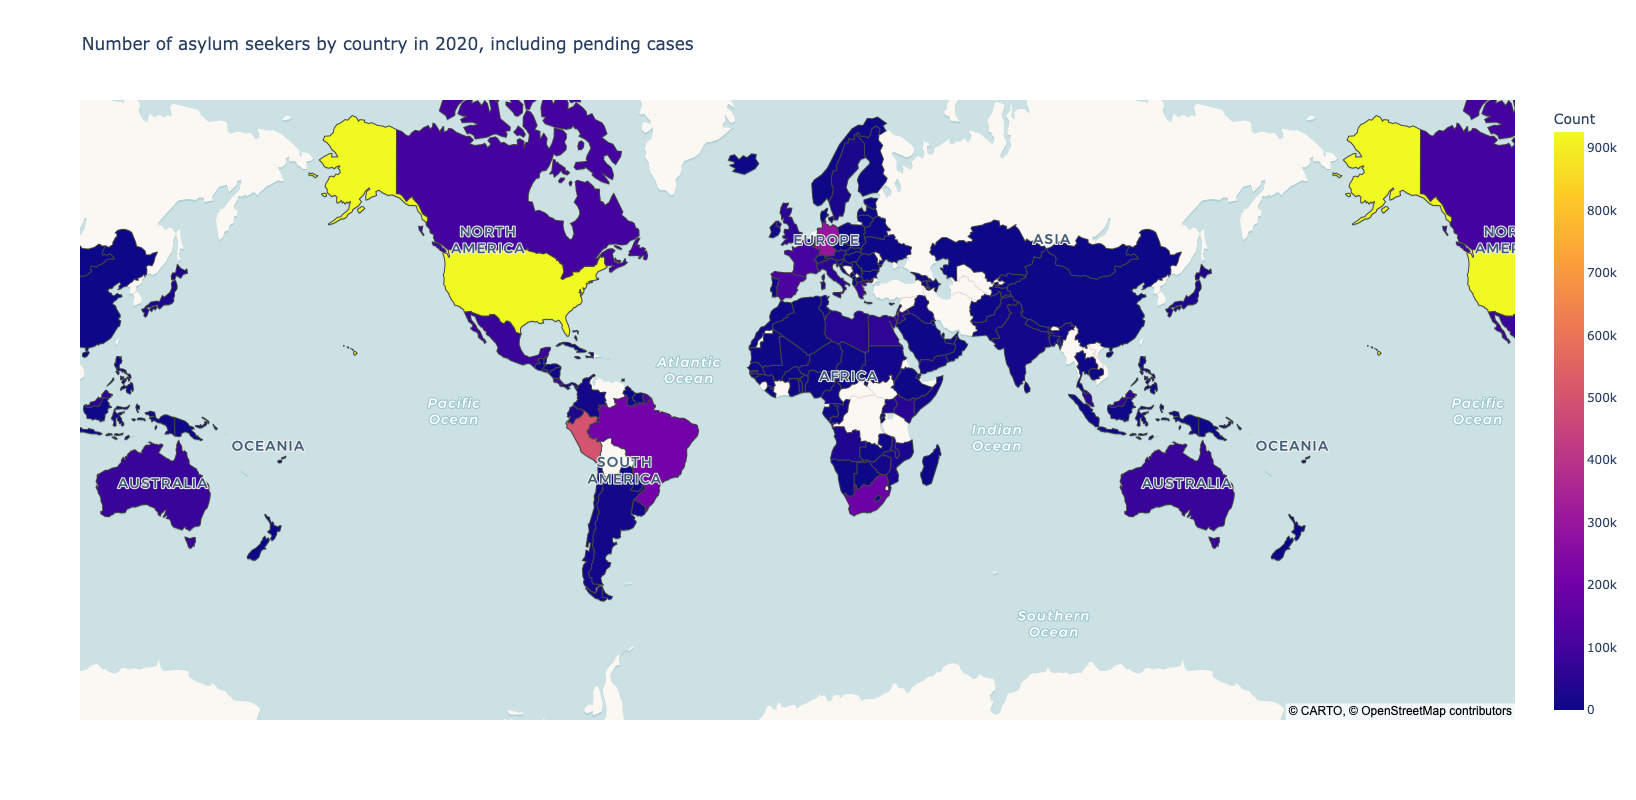

In [18]:
column = "Asylum seekers, including pending cases (number)"

fig = px.choropleth_map(
    migrants_2020,                   # source data
    locations="Region/Country/Area", # column name to match on
    geojson=countries,               # shapes
    featureidkey="properties.NAME",  # GeoJSON property to match on
    color=column,                    # column name for values
    labels={column: "Count"},        # change the name to make the legend narrower
    title="Number of asylum seekers by country in 2020, including pending cases",
    zoom=1,
    height=800,
)
fig.show()

**Fun fact** (for a certain kind of person): [What the zoom level means](https://docs.mapbox.com/help/glossary/zoom-level/)

## Scatterplot

Using merged migrant and population data from the UN.

In [19]:
migrants_pop = pd.read_csv("https://storage.googleapis.com/python-public-policy2/data/migrants_by_country.csv.zip")
migrants_pop

Region/Country/Area  Year     Migrants    Population  Migrant %
0    Total, all countries or areas  2015  247958644.0  7.470490e+09   0.033192
1                           Africa  2015   22860792.0  1.220080e+09   0.018737
2                  Northern Africa  2015    2138918.0  2.326700e+08   0.009193
3               Sub-Saharan Africa  2015   20721874.0  9.874100e+08   0.020986
4                   Eastern Africa  2015    6696922.0  3.953300e+08   0.016940
..                             ...   ...          ...           ...        ...
251      Wallis and Futuna Islands  2015       2050.0  1.000000e+04   0.205000
252                 Western Sahara  2015       5179.0  4.900000e+05   0.010569
253                          Yemen  2015     379882.0  3.116000e+07   0.012191
254                         Zambia  2015     132107.0  1.640000e+07   0.008055
255                       Zimbabwe  2015     400482.0  1.440000e+07   0.027811

[256 rows x 5 columns]

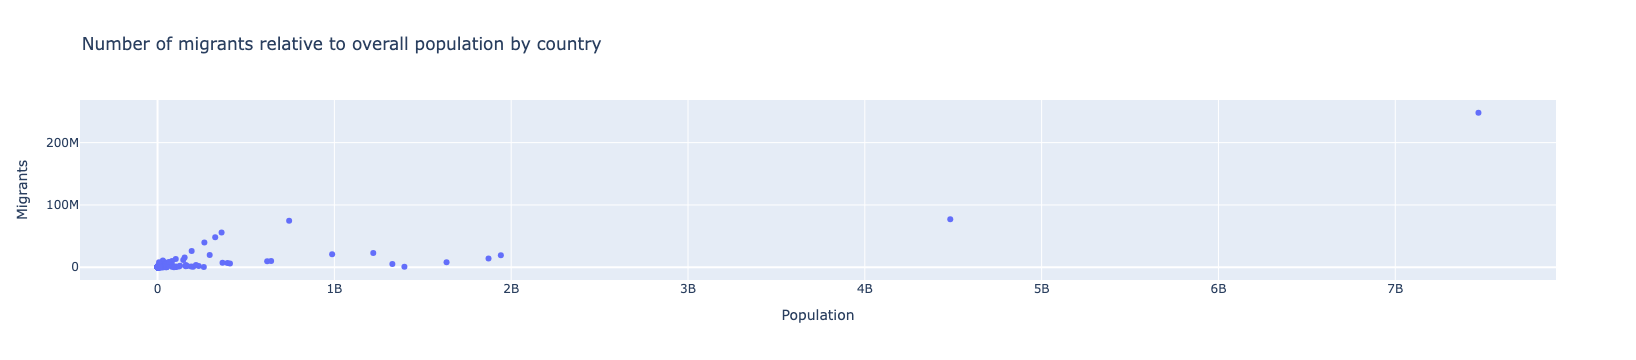

In [20]:
fig = px.scatter(
    migrants_pop,
    x="Population",
    y="Migrants",
    hover_name="Region/Country/Area",
    title="Number of migrants relative to overall population by country",
)
fig.show()

[Add a trendline](https://plotly.com/python/linear-fits/):

In [21]:
fig = px.scatter(
    migrants_pop,
    x="Population",
    y="Migrants",
    hover_name="Region/Country/Area",
    title="Number of migrants relative to overall population by country",
    trendline="ols",
)
fig.show()

Let's take a look at the statistical summary, via the [`statsmodels`](https://www.statsmodels.org/) package, following [Plotly's example](https://plotly.com/python/linear-fits/#fitting-multiple-lines-and-retrieving-the-model-parameters):

In [22]:
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     791.2
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.45e-80
Time:                        01:25:29   Log-Likelihood:                -4455.6
No. Observations:                 256   AIC:                             8915.
Df Residuals:                     254   BIC:                             8922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.231e+05   5.62e+05      0.931      0.353   -5.84e+05    1.63e+06
x1             0.0260      0.001     28.128      0.000       0.024       0.028
==============================================================================
Omnibus:                      140.267   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4264.010
Skew:                           1.549   Prob(JB):                         0.00
Kurtosis:                      22.752   Cond. No.                     6.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

["In general, the higher the R-squared, the better the model fits your data."](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

## Chart hygiene

- Always include a title
- Make sure you label dependent and independent variables (X and Y axes)
- Consider whether you are working with continuous vs. discrete values
- If you're trying to show more than three variables at once (e.g. X axis, Y axis, and color), try simplifying

## What visualization should I use?

Rudimentary guidelines:

What do you want to do? | Chart type
:-- | :-:
Show changes over time | Line chart
Compare values for categorical data | Bar chart
Compare two numeric variables | Scatter plot
Count things / show distribution across a range | Histogram
Show geographic trends | [Map (choropleth, hexbin, bubble, etc.)](https://plotly.com/python/maps/)

The [Data Design Standards](https://xdgov.github.io/data-design-standards/visualizations/) goes into more detail.

## [Homework 3](https://python-public-policy.afeld.me/en/nyu/hw_3.html)

## Final Project

In real/ideal world, start with specific question and find data to answer it:

![project flow](extras/img/projectflow.png)

_Source: [Big Data and Social Science](https://textbook.coleridgeinitiative.org/chap-intro.html#the-structure-of-the-book)_

Data needed often doesn't exist or is hard (or impossible) to find/access

![project flow](extras/img/projectflow_amended.png)

[Final Project](https://python-public-policy.afeld.me/en/nyu/final_project.html)